# Introduction

Speech Introduction

# Analyse dataset

Import des librairies

In [17]:
from stroke_alert import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import pointbiserialr

Lecture dataset

In [3]:
# Lecture du fichier CSV
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

Visualisation des données

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Renommage des variables

In [5]:
# Renommage des variables
df["gender"] = df["gender"].replace({
    "Male" : "Homme", 
    "Female" : "Femme", 
    "Other" : "Autre"
    })

df["hypertension"] = df["hypertension"].replace({
    1 : "Yes", 
    0 : "No"
    })

df["heart_disease"] = df["heart_disease"].replace({
    1 : "Yes", 
    0 : "No"
    })

df["work_type"] = df["work_type"].replace({
    'Private' : "Secteur privé", 
    'Self-employed' : "Auto-entrepreneur", 
    'Govt_job' : "Fonctionnaire", 
    'children' : "Enfant", 
    'Never_worked' : "Sans emploi"
    })

df["Residence_type"] = df["Residence_type"].replace({
    'Urban' : "Ville", 
    'Rural' : "Campagne"
    })

df["smoking_status"] = df["smoking_status"].replace({
    'formerly smoked' : "Ancien fumeur", 
    'never smoked' : "Non fumeur", 
    'smokes' : "Fumeur", 
    'Unknown' : "Non connu"
    })

df["stroke"] = df["stroke"].replace({
    1 : "Yes", 
    0 : "No"
    })

Visualisation des dimensions du dataframe

In [6]:
# Prise en compte des dimensions du dataframe
df.shape

print(f"Le dataframe contient {df.shape[0]} lignes et {df.shape[1]} colonnes")

Le dataframe contient 5110 lignes et 12 colonnes


Nombre de valeurs uniques de chaque variable

In [7]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

Visualisation descriptive statistique (variables quantitatives)

In [8]:
df.describe()

,id,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000,4909.000000
mean,36517.829354,43.226614,106.147677,28.893237
std,21161.721625,22.612647,45.283560,7.854067
min,67.000000,0.080000,55.120000,10.300000
25%,17741.250000,25.000000,77.245000,23.500000
50%,36932.000000,45.000000,91.885000,28.100000
75%,54682.000000,61.000000,114.090000,33.100000
max,72940.000000,82.000000,271.740000,97.600000


Visualisation descriptive statistique (variables qualitatives)

In [9]:
df.describe(include='object')

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
count,5110,5110,5110,5110,5110,5110,5110,5110
unique,3,2,2,2,5,2,4,2
top,Femme,No,No,Yes,Secteur privé,Ville,Non fumeur,No
freq,2994,4612,4834,3353,2925,2596,1892,4861


Visualisation des elements manquants et du type de chaque variable

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   object 
 4   heart_disease      5110 non-null   object 
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 479.2+ KB


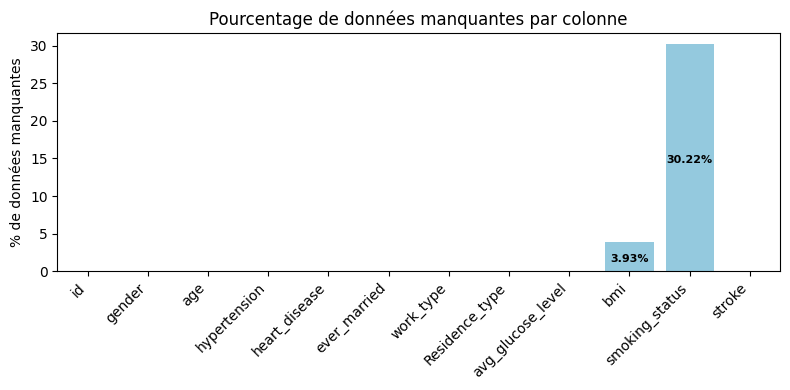

In [11]:
# Calculer le pourcentage de données manquantes par colonne
pourcentage_manquant_par_colonne = df.copy()
pourcentage_manquant_par_colonne["smoking_status"] = pourcentage_manquant_par_colonne["smoking_status"].replace("Non connu", np.nan)
pourcentage_manquant_par_colonne = pourcentage_manquant_par_colonne.isnull().sum() / len(df) * 100

# Créer le graphique à barres
plt.figure(figsize=(8, 4))
sns.barplot(pourcentage_manquant_par_colonne, color='skyblue')
plt.title('Pourcentage de données manquantes par colonne')
plt.ylabel("% de données manquantes")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()



# Ajouter les valeurs non nulles au-dessus de chaque barre
for i, v in enumerate(pourcentage_manquant_par_colonne.values):
    if v != 0:  # Vérifier si la valeur est non nulle
        plt.text(i, (v / 2) - 1, f"{round(v, 2)}%", ha='center', va='bottom', fontsize=8, fontweight='bold')
        

plt.show()

Analyse univariées des variables quantitatives

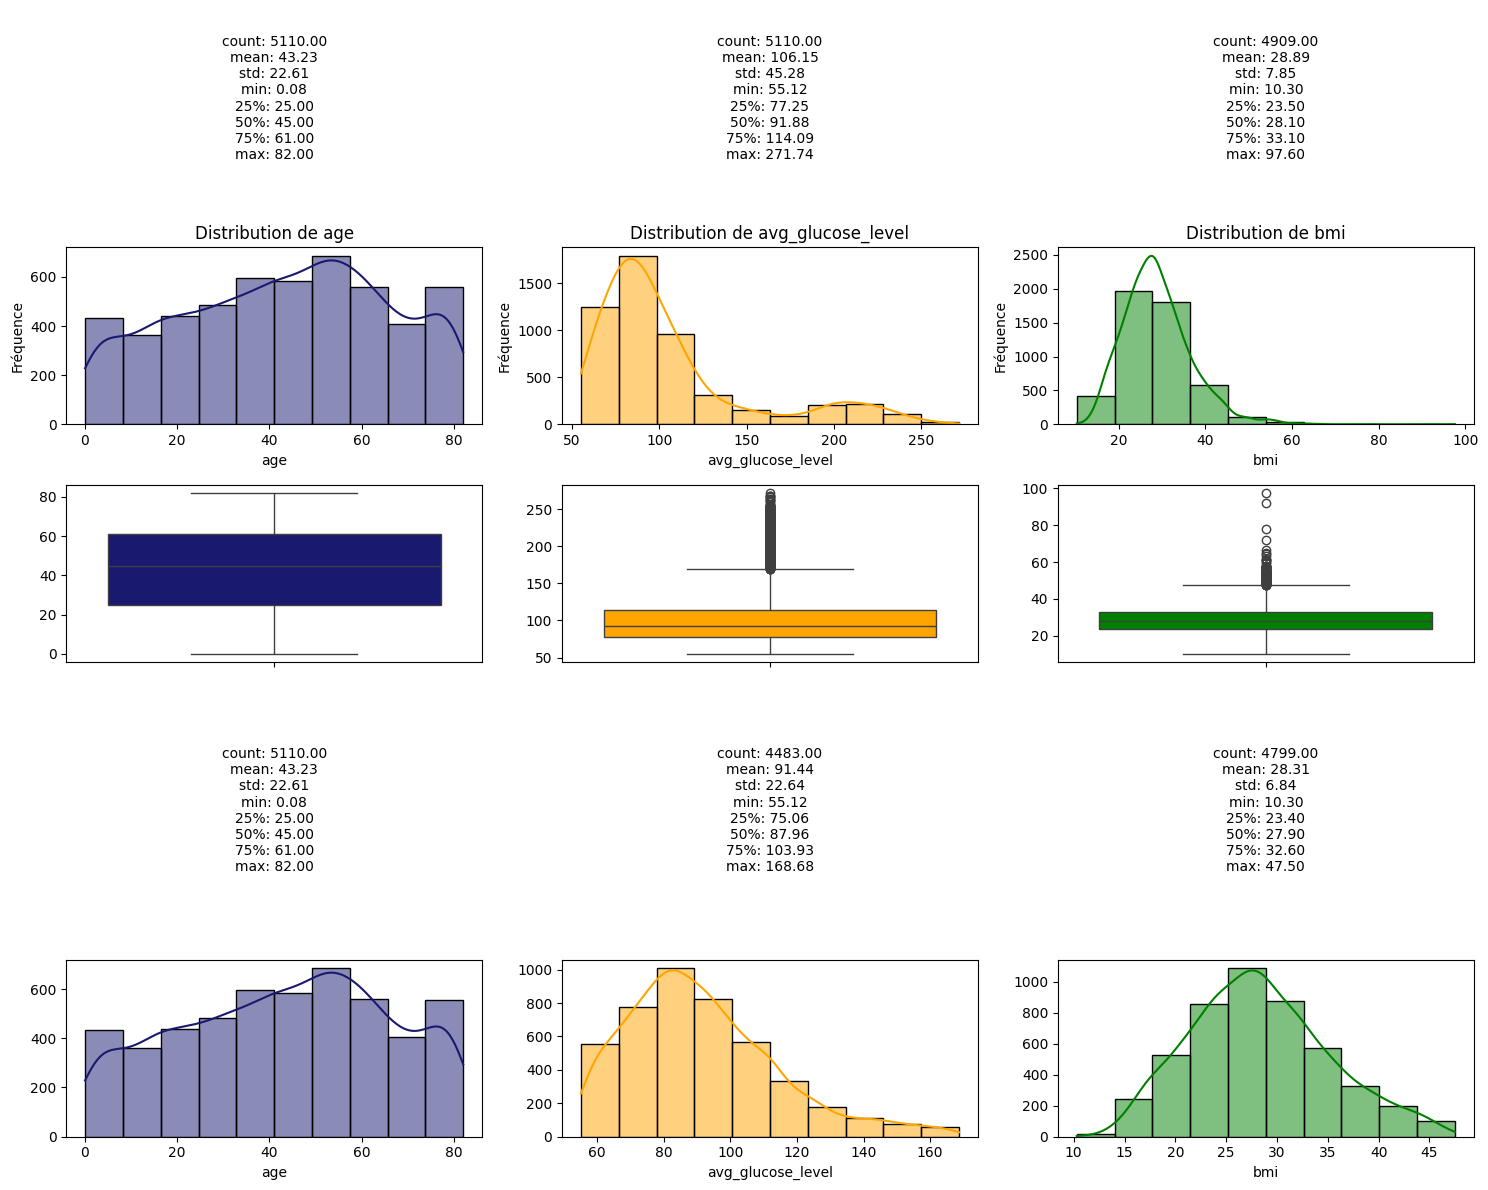

In [12]:
# Création de la figure et des axes
fig, axes = plt.subplots(5, len(variables_quantitatives), figsize=(15, 12))

# Boucle pour générer les graphiques pour chaque variable
for i, (variable, color) in enumerate(zip(variables_quantitatives, colors_quantitative)):
    
    # Statistiques descriptives
    stats = df[variable].describe()
    stats_text = "\n".join([f"{stat}: {value:.2f}" for stat, value in stats.items()])

    # Ajout des statistiques descriptives au-dessus du leur graphique
    axes[0, i].text(0.5, 0.5, stats_text, fontsize=10, ha='center', va='center', transform=axes[0, i].transAxes)
    axes[0, i].axis('off')

    # Histogramme des données brutes
    sns.histplot(df[variable], bins=10, color=color, kde=True, ax=axes[1, i])
    axes[1, i].set_title(f'Distribution de {variable}')
    axes[1, i].set_ylabel('Fréquence')

    # Boîte à moustaches
    sns.boxplot(df[variable], patch_artist=True, boxprops=dict(facecolor=color), ax=axes[2, i])
    axes[2, i].set_xlabel('')
    axes[2, i].set_ylabel('')

    # Filtrage des données sans les outlets
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_data = df[(df[variable] >= lower_bound) & (df[variable] <= upper_bound)]
    
    
    # Statistiques descriptives sans les outlets
    stats_filtred = filtered_data[variable].describe()
    stats_text_filtred = "\n".join([f"{stat}: {value:.2f}" for stat, value in stats_filtred.items()])

    # Ajout des statistiques descriptives au-dessus du leur graphique
    axes[3, i].text(0.5, 0.5, stats_text_filtred, fontsize=10, ha='center', va='center', transform=axes[3, i].transAxes)
    axes[3, i].axis('off')
    
    # Histogramme des données brutes sans les outlets
    sns.histplot(filtered_data[variable], bins=10, color=color, kde=True, ax=axes[4, i])
    axes[4, i].set_xlabel(variable)
    axes[4, i].set_ylabel('')

# Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()

Analyse univariées des variables qualitatives (bargraphe)

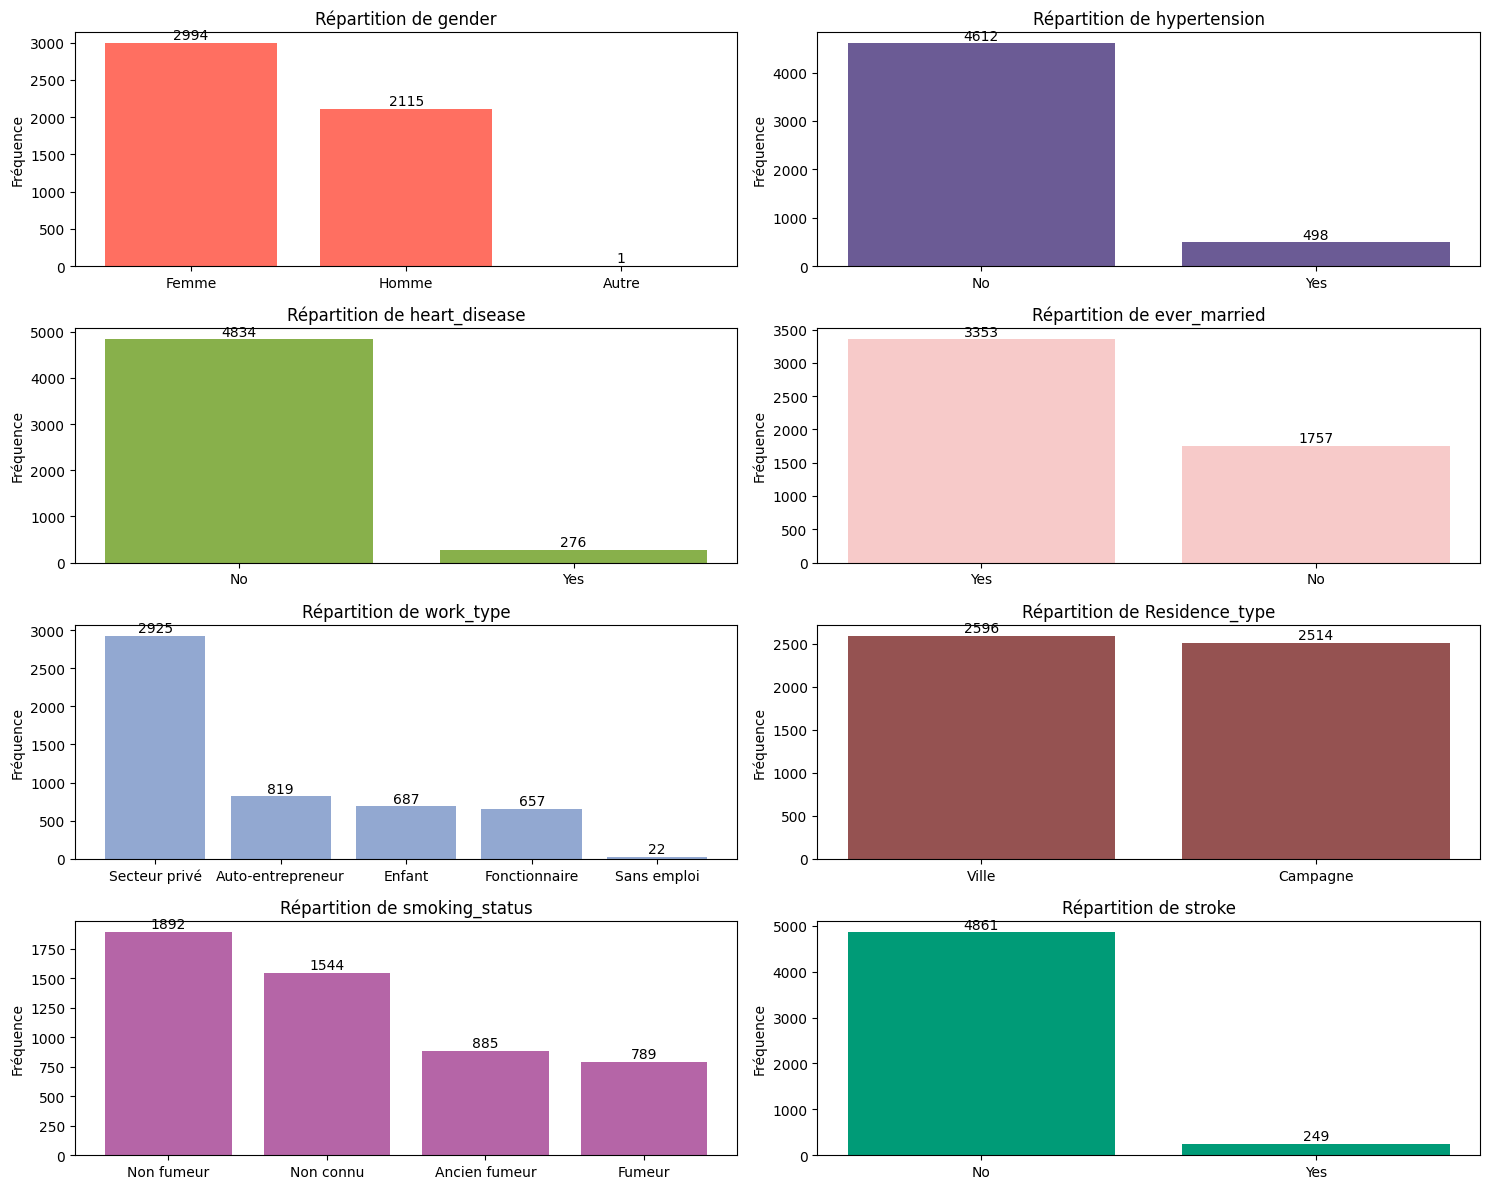

In [13]:
# Calcul du nombre de graphiques sur chaque rangée
num_total_variables = len(variables_qualitatives)
num_graphs_last_row = num_total_variables % 2  # Nombre de graphiques sur la dernière ligne
num_rows = (num_total_variables - num_graphs_last_row) // 2 + num_graphs_last_row
num_cols = 2 if num_graphs_last_row == 0 else num_graphs_last_row

# Création d'une figure globale avec des sous-graphiques
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))

# Boucle pour générer les graphiques pour chaque variable qualitative + diagrammes en barres
for i, (variable, color) in enumerate(zip(variables_qualitatives, colors_qualitative)):
    # Compter les occurrences de chaque catégorie
    counts = df[variable].value_counts()

    # Identifier les sous-graphiques
    row = i // 2  # Calcul de la ligne
    col = i % 2   # Calcul de la colonne

    # Diagramme en barres
    ax = axes[row, col]
    ax.bar(counts.index, counts.values, color=color)
    ax.set_title(f'Répartition de {variable}')
    ax.set_ylabel('Fréquence')

    # Ajout des valeurs au-dessus des barres
    for j, count in enumerate(counts.values):
        ax.text(j, count + 10, str(count), ha='center', va='bottom')

# Ajuster l'espacement entre les sous-graphiques
plt.subplots_adjust(hspace=0.7, wspace=0.5)

plt.tight_layout()
plt.show()

Analyse univariées des variables qualitatives (camembert)

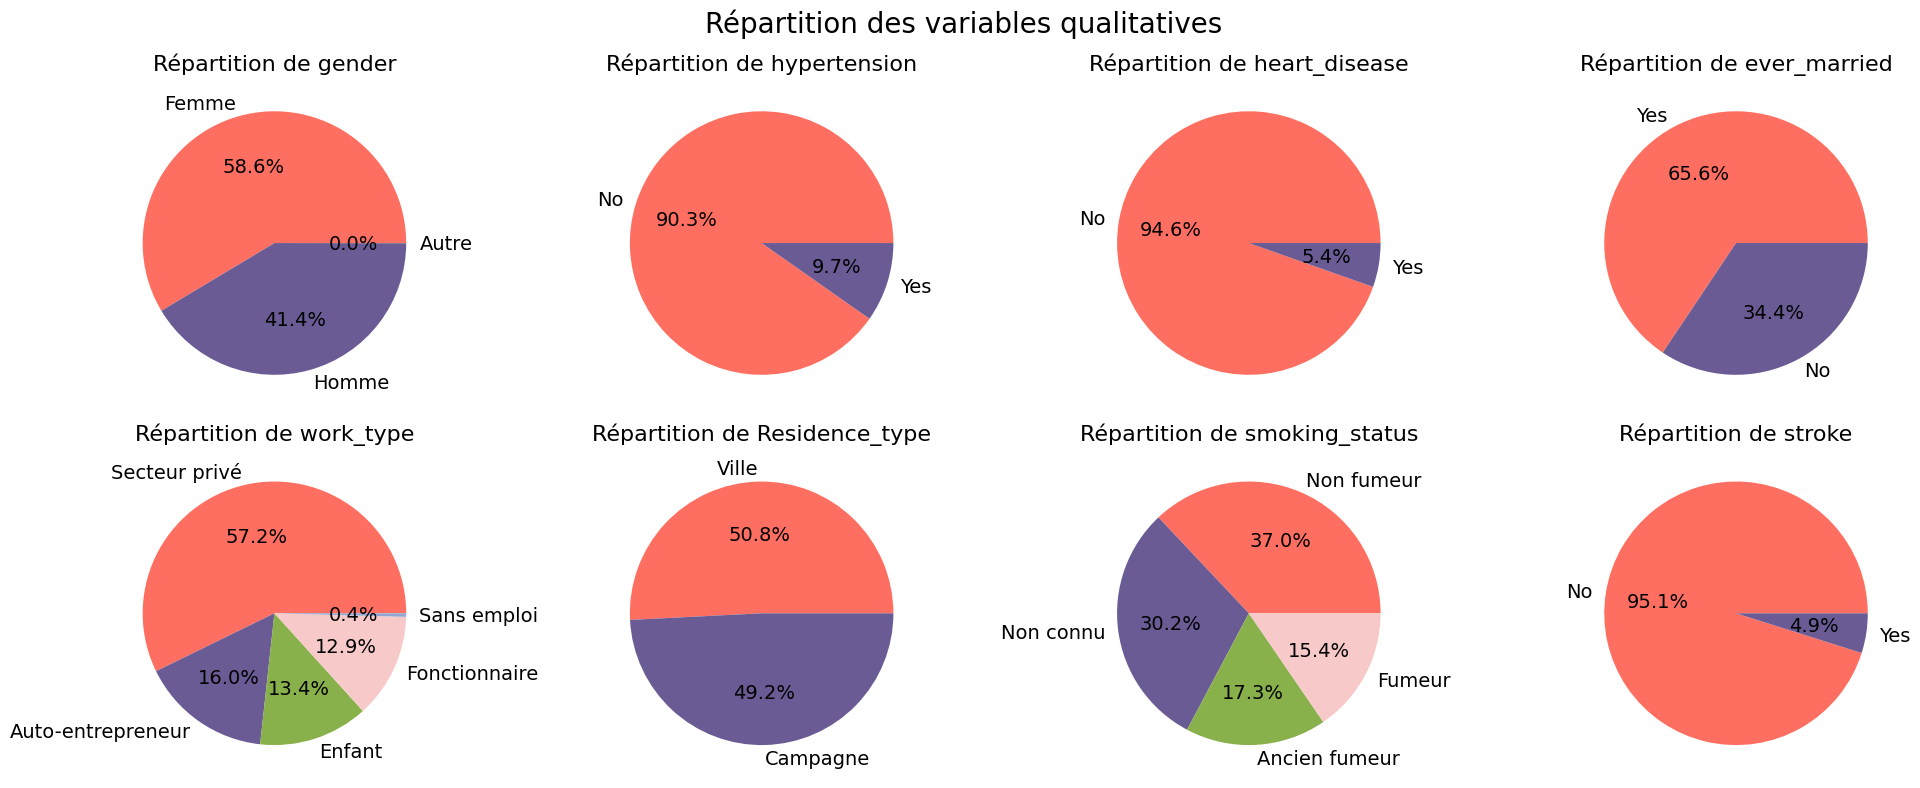

In [14]:
# Calcul du nombre de graphiques sur chaque rangée
num_total_variables = len(variables_qualitatives)
num_graphs_per_row = 4  # Quatre graphiques par ligne
num_rows = (num_total_variables + num_graphs_per_row - 1) // num_graphs_per_row

# Définir la taille de la figure
figsize_width = 20  # Largeur de la figure
figsize_height = num_rows * 4  # Hauteur de la figure, ajustée en fonction du nombre de lignes

# Création d'une figure globale avec des sous-graphiques
fig, axes = plt.subplots(num_rows, num_graphs_per_row, figsize=(figsize_width, figsize_height))

# Boucle pour générer les graphiques pour chaque variable qualitative + diagrammes en camembert
for i, (variable, color) in enumerate(zip(variables_qualitatives, colors_qualitative)):
    # Comptage des occurrences de chaque catégorie
    counts = df[variable].value_counts()
    row = i // num_graphs_per_row
    col = i % num_graphs_per_row

    # Diagramme en camembert
    ax = axes[row, col]
    ax.pie(counts, labels=counts.index, colors=colors_qualitative[:len(counts)], autopct='%1.1f%%', textprops={'fontsize': 14})
    ax.set_title(f'Répartition de {variable}', fontsize=16)
    ax.set_ylabel('', fontsize=14)

# Agrandir la police du titre de la figure
plt.suptitle('Répartition des variables qualitatives', fontsize=20)
plt.tight_layout()
plt.show()

Analyses bivariées pour les variables quantitatives avec les trois methodes : Pearson, Spearman, Kendall

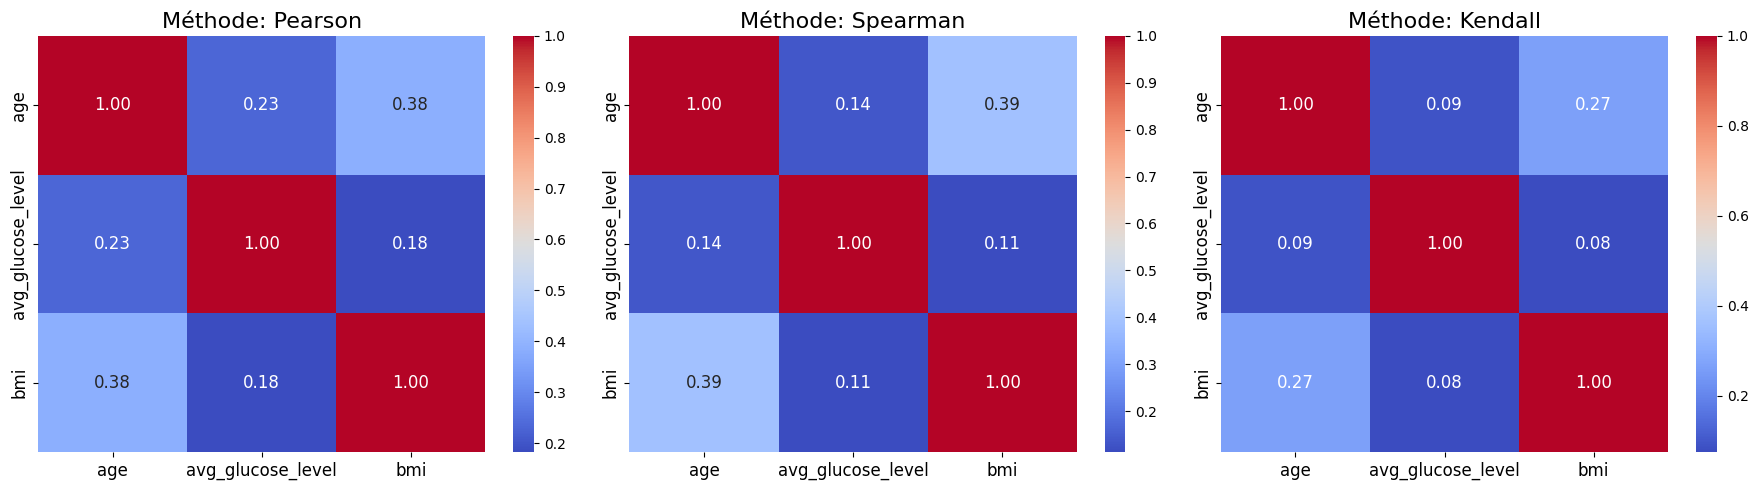

In [25]:
quantitative_columns = ['age', 'avg_glucose_level', 'bmi']

# Liste des méthodes de corrélation
methods = ['pearson', 'spearman', 'kendall']

# Créeation d'une figure avec plusieurs sous-graphiques
fig, axes = plt.subplots(1, len(methods), figsize=(18, 5))

# Boucle sur les méthodes de corrélation et génération des graphiques
for i, method in enumerate(methods):
    # Calcule de la matrice de corrélation avec la méthode spécifiée
    correlation_matrix = filtered_data[quantitative_columns].corr(method=method)
    
    # Création de la heatmap pour la matrice de corrélation
    heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12}, ax=axes[i])
    heatmap.set_title(f'Méthode: {method.capitalize()}', fontsize=16)
    
    # Réduction de la taille des noms des colonnes sur les axes x et y
    heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=12)
    heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=12)
plt.tight_layout()
plt.show()

 Calcul de la corrélation bivariable de nos variables quantitatives avec la méthode "pointbiserialr" et suppression des lignes avec des valeurs NaN dans les colonnées utilisées pour le calcul

C:\Users\Consultant\AppData\Local\Temp\ipykernel_10004\2456034475.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["stroke"] = filtered_data["stroke"].replace({"Yes" : 1, "No" : 0})


Corrélation bisériale entre Age et Stroke : 0.23, p-value : 0.0000
Corrélation bisériale entre Avg_glucose_level et Stroke : 0.14, p-value : 0.0000
Corrélation bisériale entre Bmi et Stroke : 0.06, p-value : 0.0000


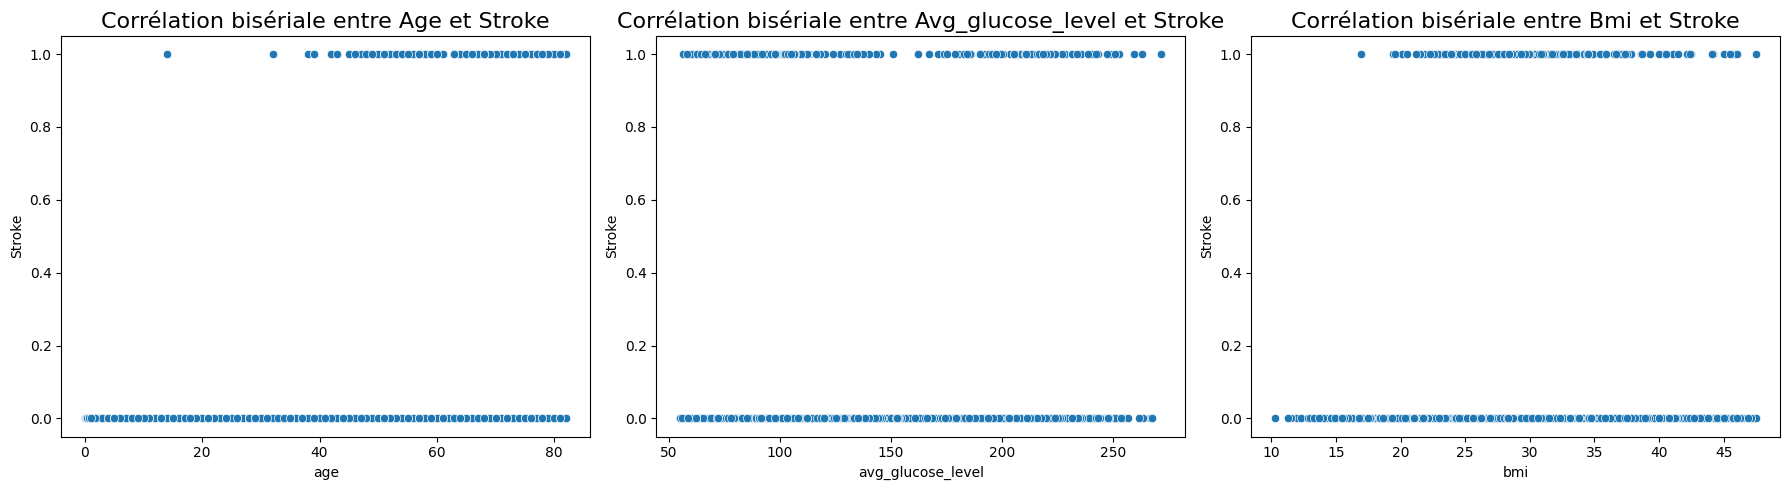

In [26]:
# Appliquer le remplacement à la colonne 'stroke' pour l'analyse 
filtered_data["stroke"] = filtered_data["stroke"].replace({"Yes" : 1, "No" : 0})

# Suppression des lignes contenant des valeurs NaN dans les colonnes utilisées pour le calcul de la corrélation
df_cleaned = filtered_data.dropna(subset=['stroke', 'age', 'avg_glucose_level', 'bmi'])

# Sélectionnez les colonnes quantitatives pour la corrélation avec stroke
quantitative_columns = ['age', 'avg_glucose_level', 'bmi']

# Création d'une figure avec une seule rangée et trois colonnes
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Tracé des graphiques pour chaque variable quantitative
for i, column in enumerate(quantitative_columns):
    # Calcul de la corrélation bisériale entre la variable quantitative et stroke
    correlation_coefficient, p_value = pointbiserialr(df_cleaned['stroke'], df_cleaned[column])
    
    # Affichage du coefficient de corrélation et de la valeur p
    print(f"Corrélation bisériale entre {column.capitalize()} et Stroke : {correlation_coefficient:.2f}, p-value : {p_value:.4f}")
    
    # Tracé du scatter plot avec la variable quantitative et la variable binaire (stroke)
    sns.scatterplot(data=df_cleaned, x=column, y='stroke', ax=axes[i])
    axes[i].set_title(f'Corrélation bisériale entre {column.capitalize()} et Stroke', fontsize=16)
    axes[i].set_ylabel('Stroke')
    axes[i].set_xlabel(column)

# Ajustement automatique des espaces entre les sous-graphiques
plt.tight_layout()
plt.show()

Nous remarquons une petite corrélation entre l'attribut 'Age' et 'bmi', afin de mieux visualiser le type de relation entre ces deux attributs, nous allons afficher le graphe suivant:

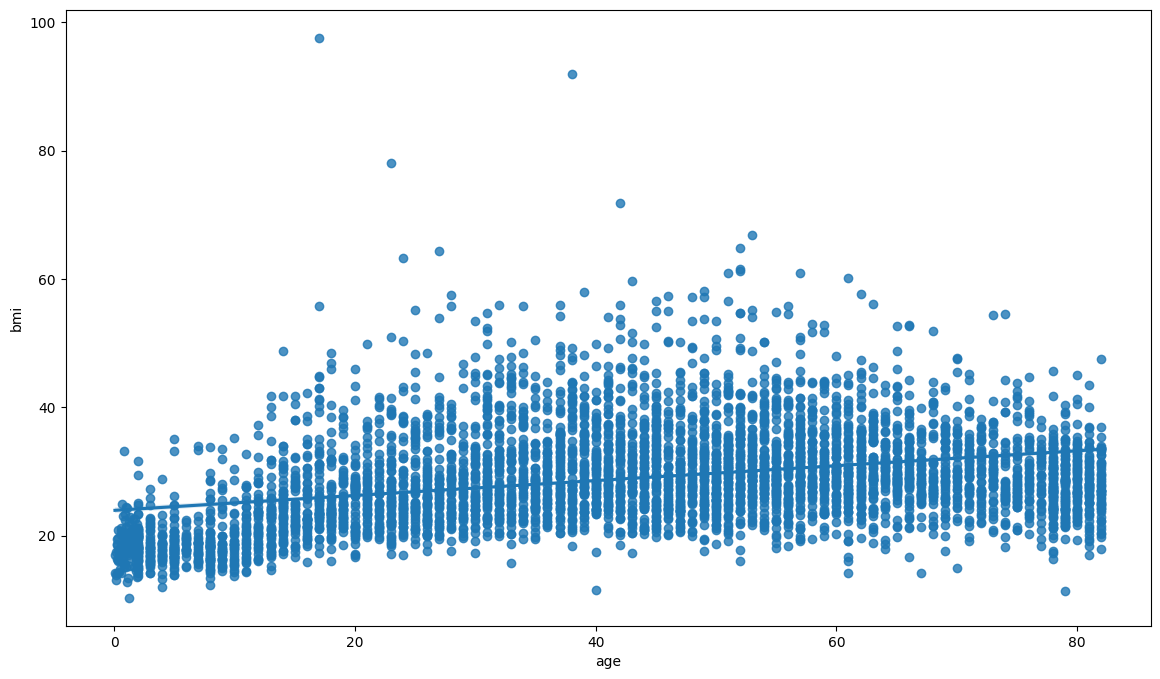

In [27]:
plt.figure(figsize=(14, 8))
sns.regplot(x = "age", y = "bmi", data = df)
plt.show()

Iterpretation de la correlation concernant les variables quantitatives:
Corrélation AGE et AVC :

- Plus la valeur de la corrélation est proche de 1 plus les patients âgés ont tendance à avoir un risque plus élevé d'AVC
- La corrélation négative forte(-1, ou proche de -1) indique que les jeunes dans notre cas ont moins de chances d'avoir un AVC.
- La corrélation proche de 0 indique une faible correlation entre l'AGE et l'AVC

Corrélation entre le niveau moyen de glucose et l'AVC :

- La corrélation positive forte montre que les niveaux plus élevés de glucose moyen sont associés à un risque plus élevé d'AVC
- Une corrélation négative forte indique le contraire, soit que des niveaux plus faibles de glucose moyen sont associés à un risque plus élevé d'AVC.
- Une corrélation proche de zéro indique une faible corrélation entre le niveau moyen de glucose et l'AVC.

Corrélation entre le BMI (Indice de masse corporelle) et l'AVC :

- Une corrélation positive forte indique que des valeurs plus élevées de BMI sont associées à un risque plus élevé d'AVC.
- Une corrélation négative forte indique le contraire, soit que des valeurs plus faibles de BMI sont associées à un risque plus élevé d'AVC.
- Enfin, une corrélation proche de zéro indique une faible corrélation entre le BMI et l'AVC.

Pour résumé notre analyse concernant les variables quantitatives, nous vouvons dire qu'un coefficient de corrélation proche de 1 indique une corrélation positive forte, un coefficient proche de -1 indique une corrélation négative forte, et un coefficient proche de zéro indique une faible corrélation. 
Il est important de tenir compte du fait que la corrélation ne signifie pas nécessairement une relation de causalité.

#  Analyses bivariées pour les variables qualitatives avec la méthode test du Chi-deux

La methode **Chi-deux** est utilisé pour garder l'independance des variables entre elles.
- Si la valeur p est inférieure à un seuil prédéfini (généralement 0,05), on rejette l'hypothèse nulle et on conclut qu'il y a une association significative entre les variables catégorielles. 
- Sinon, on ne rejette pas l'hypothèse nulle et on conclut qu'il n'y a pas suffisamment de preuves pour affirmer une relation entre les variables.

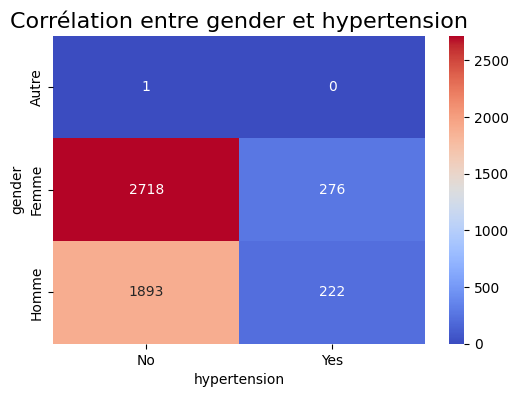

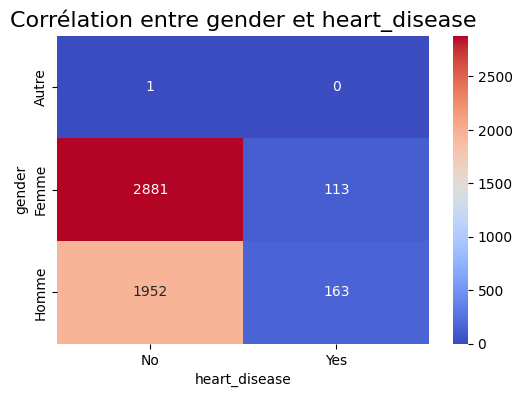

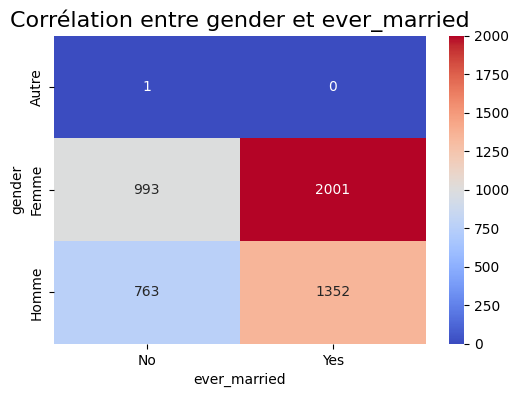

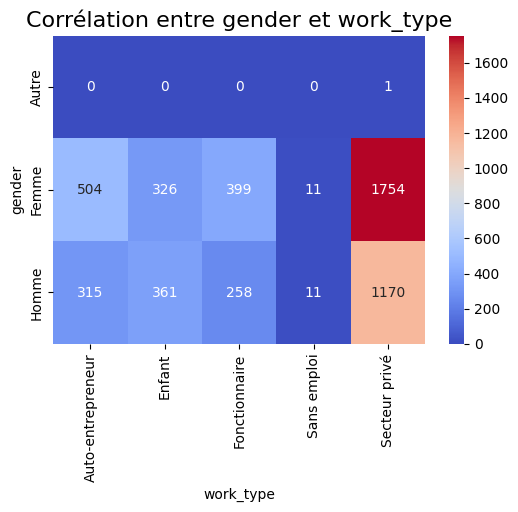

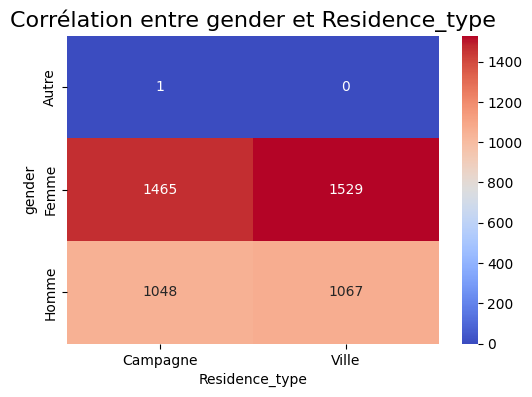

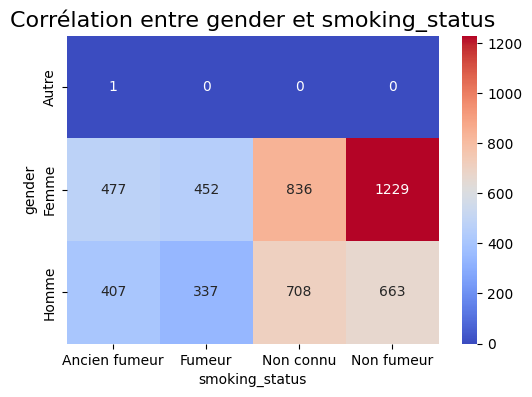

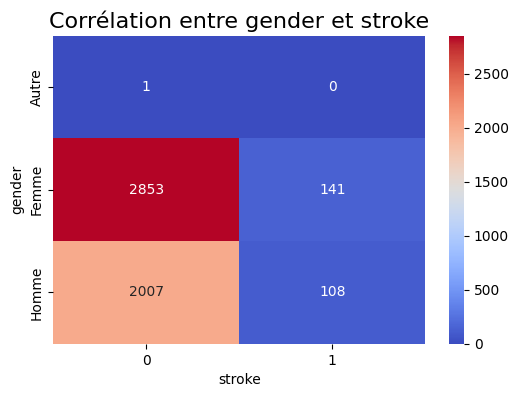

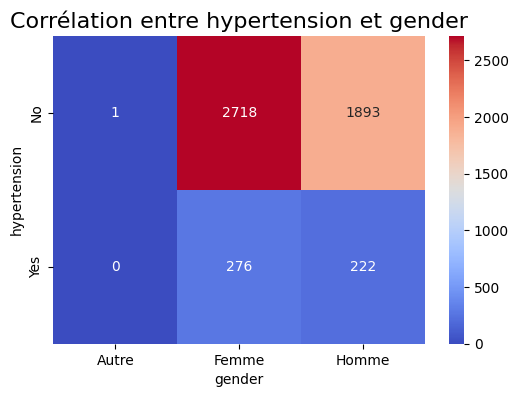

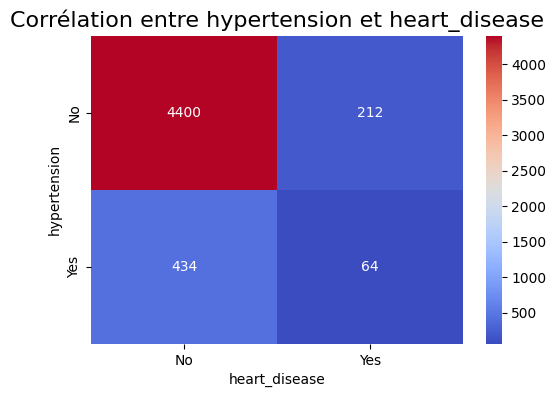

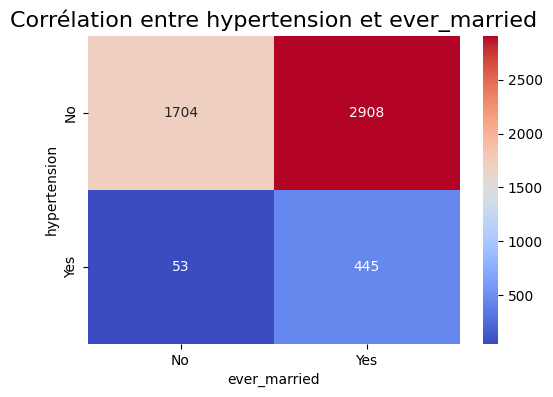

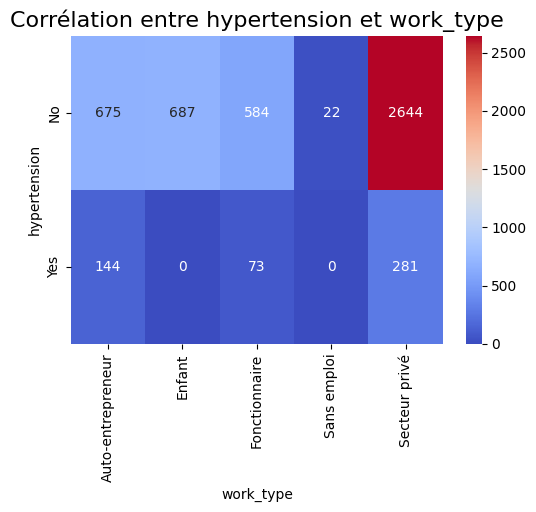

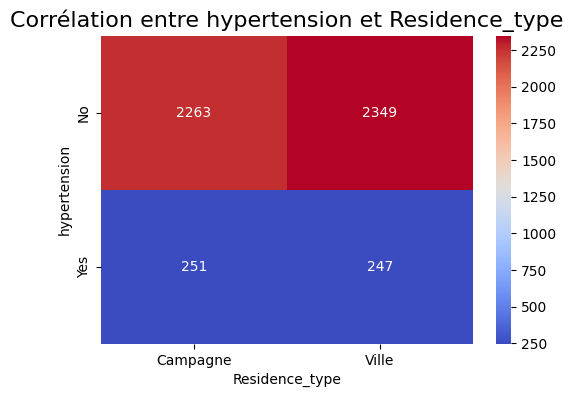

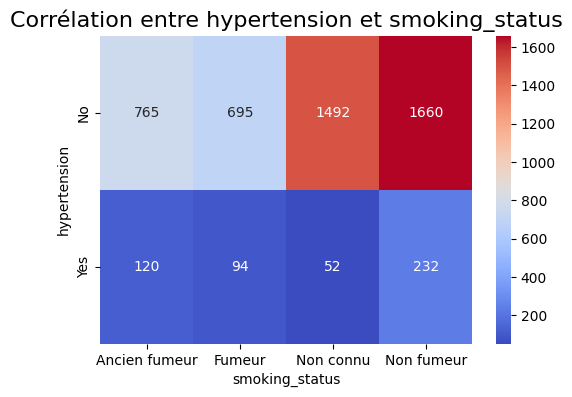

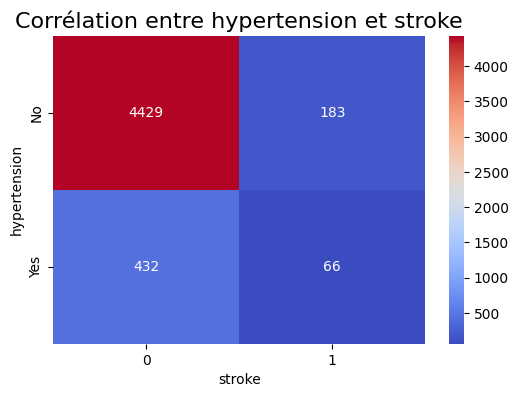

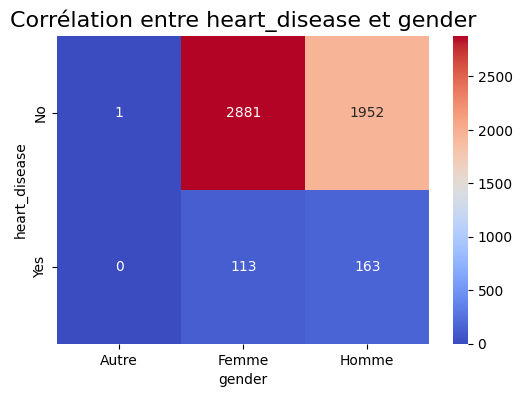

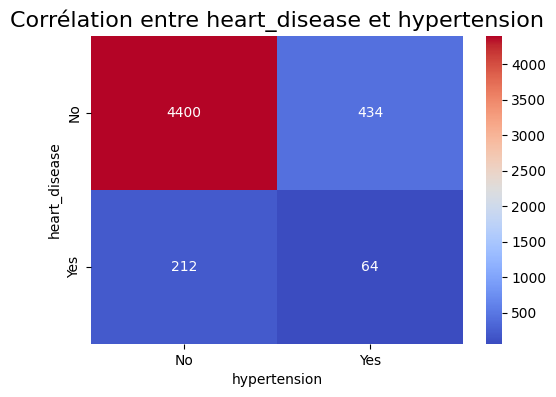

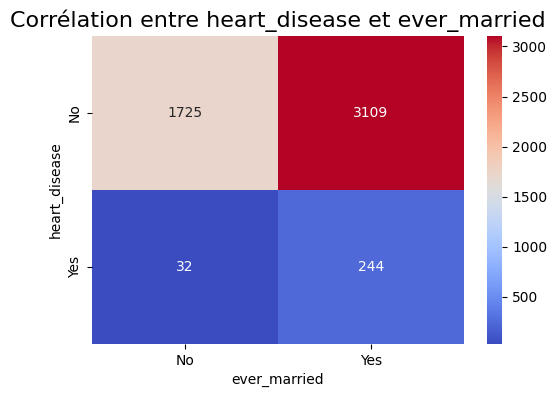

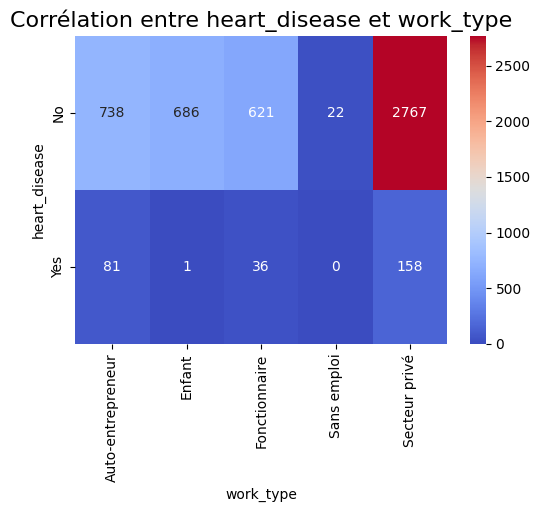

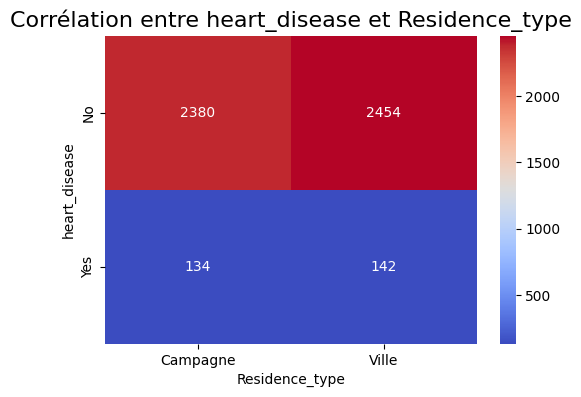

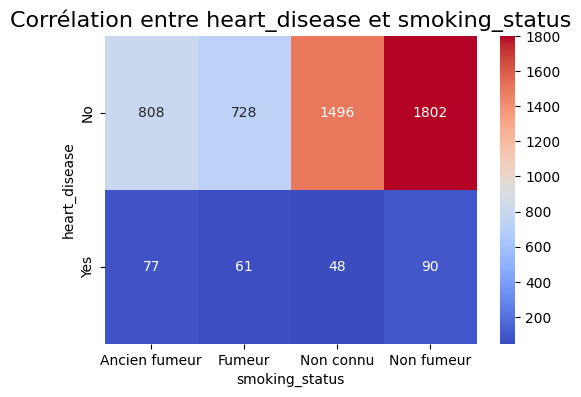

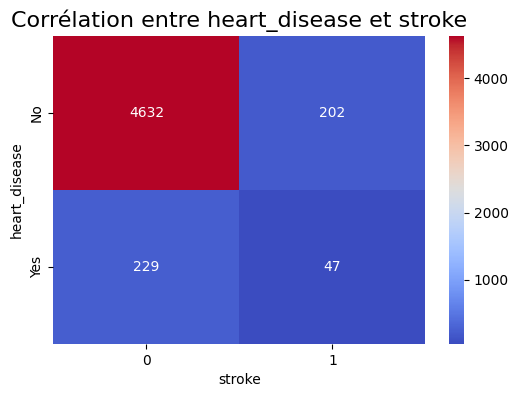

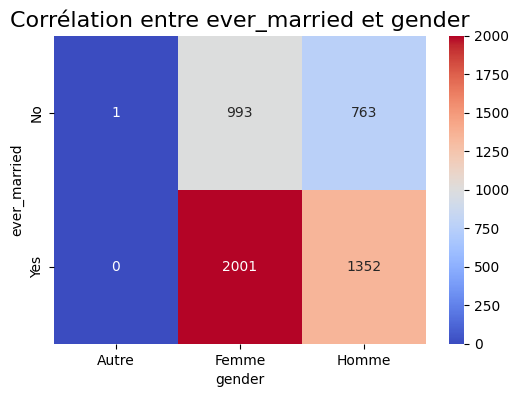

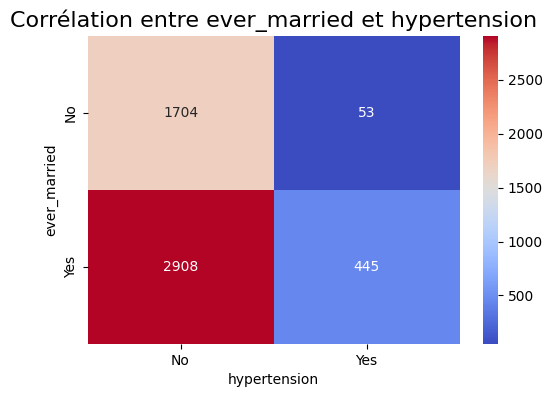

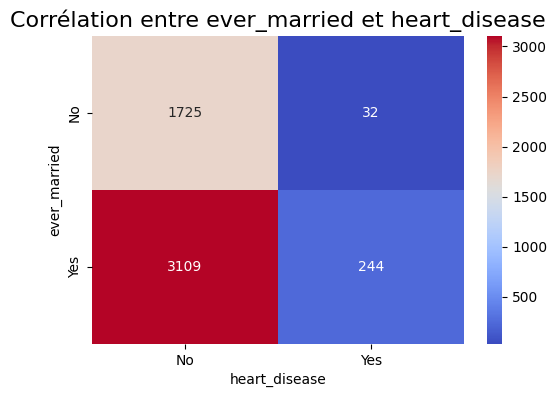

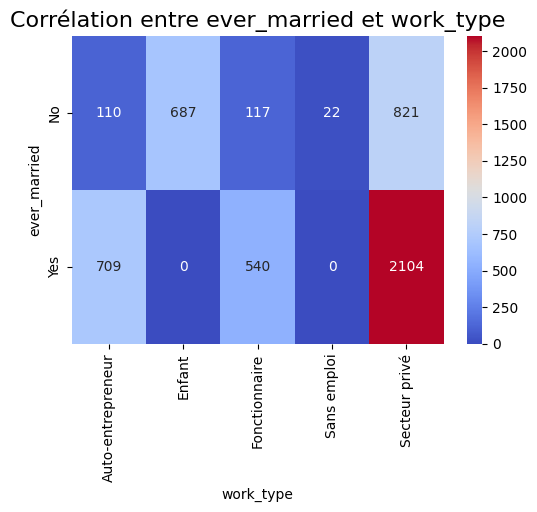

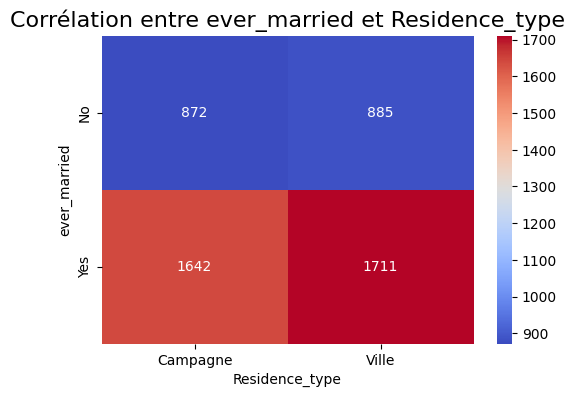

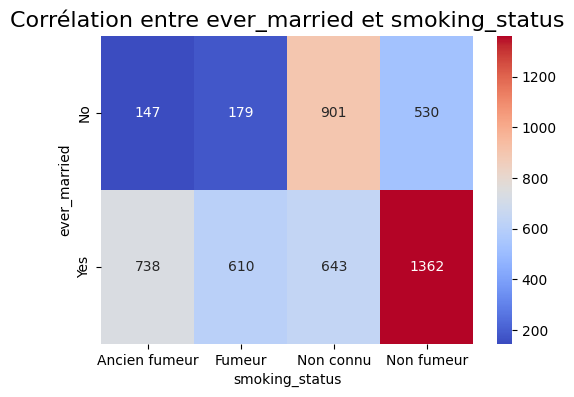

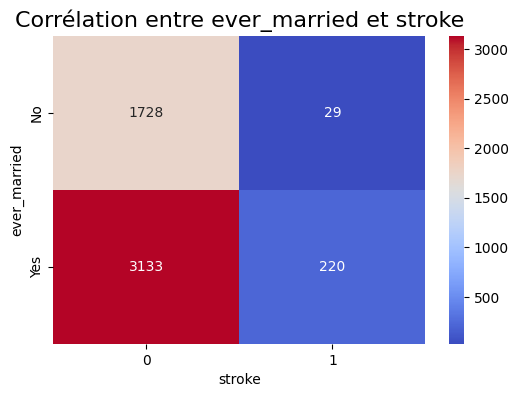

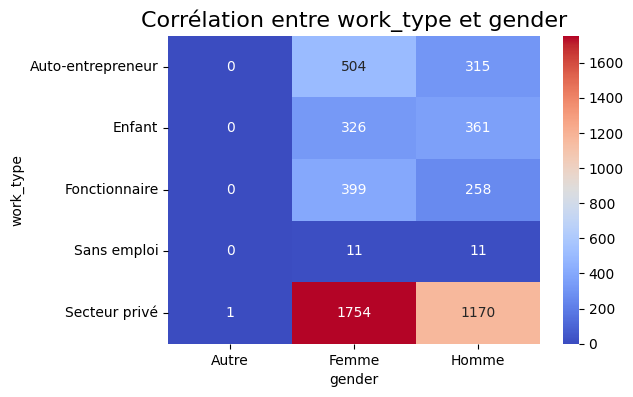

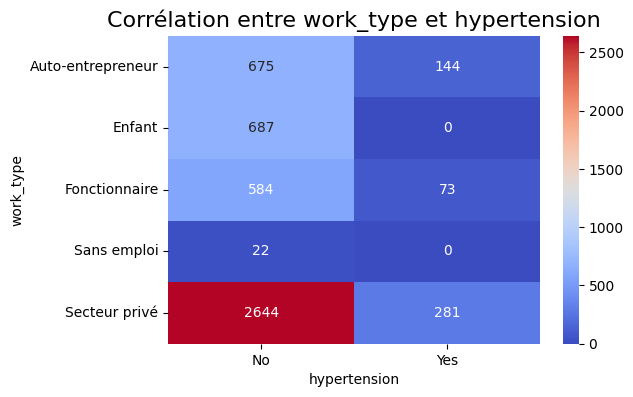

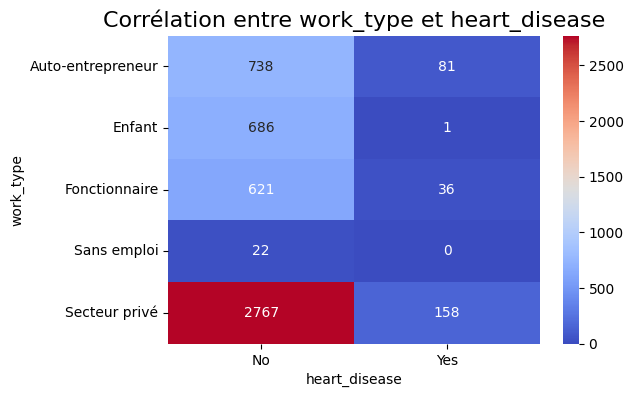

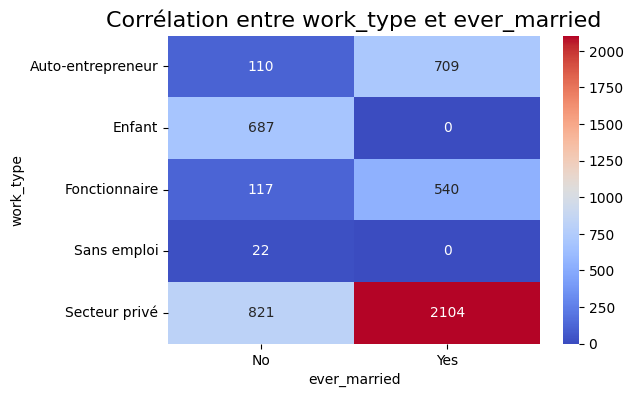

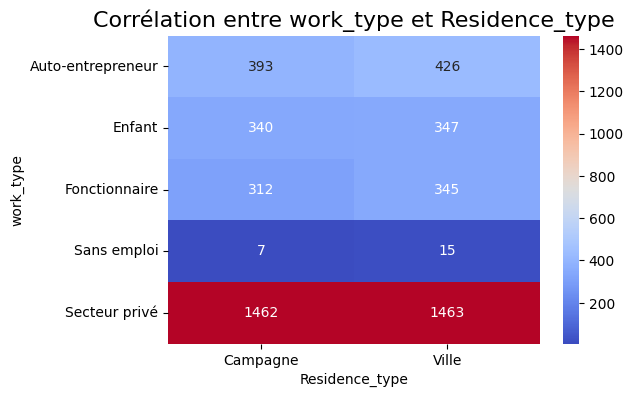

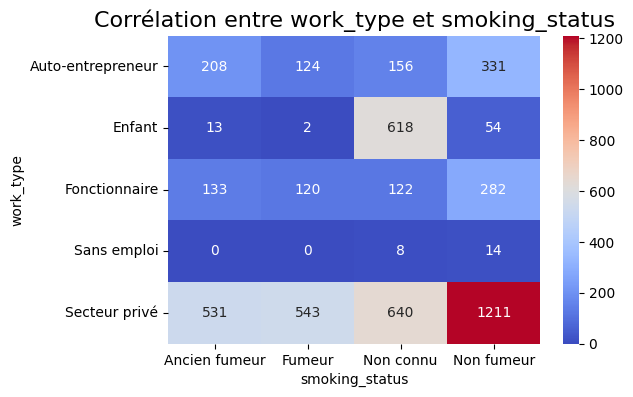

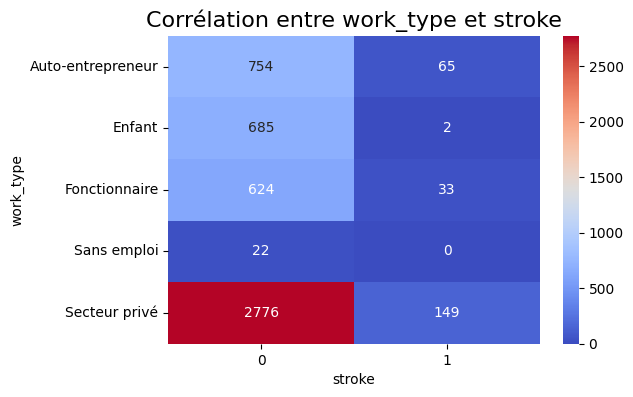

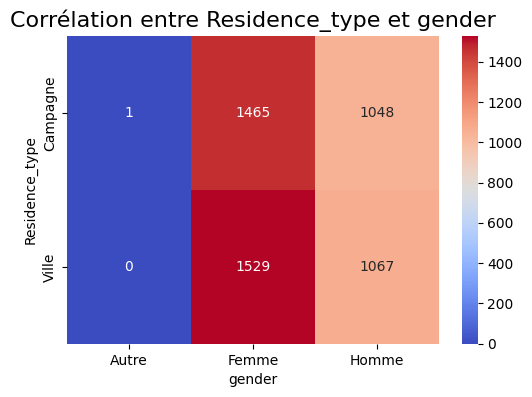

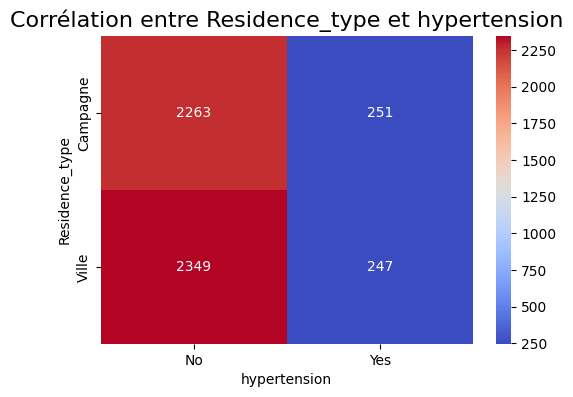

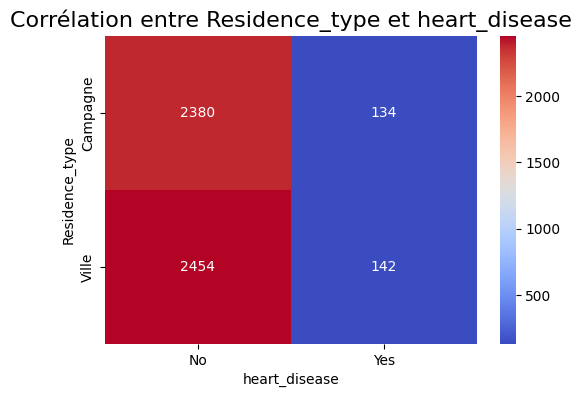

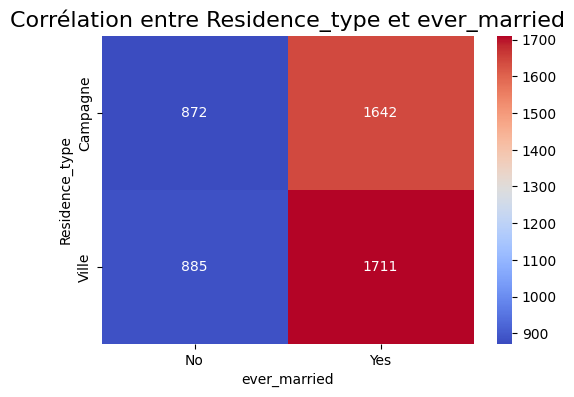

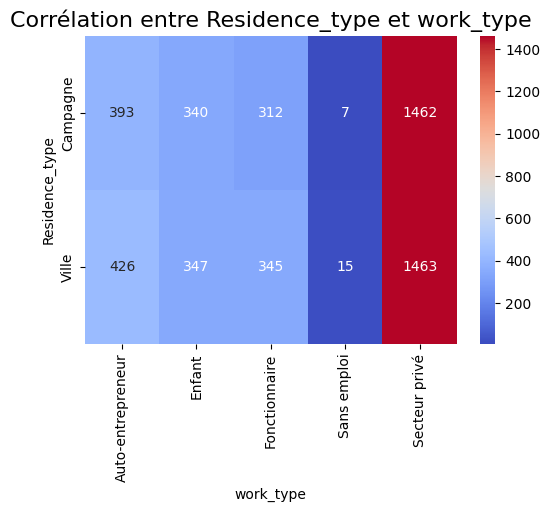

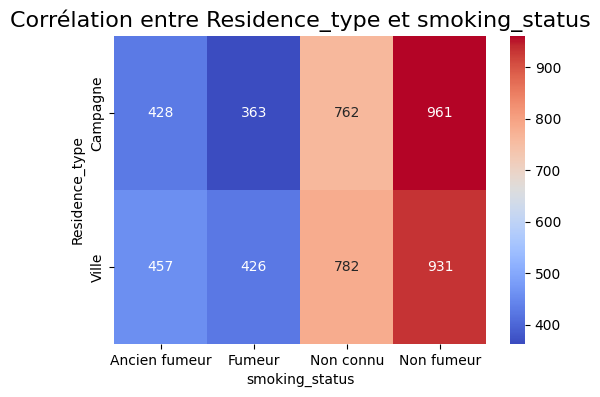

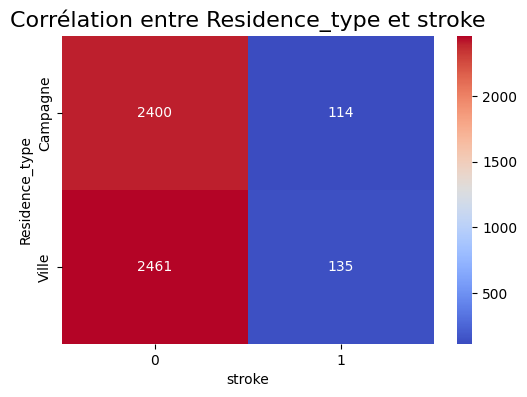

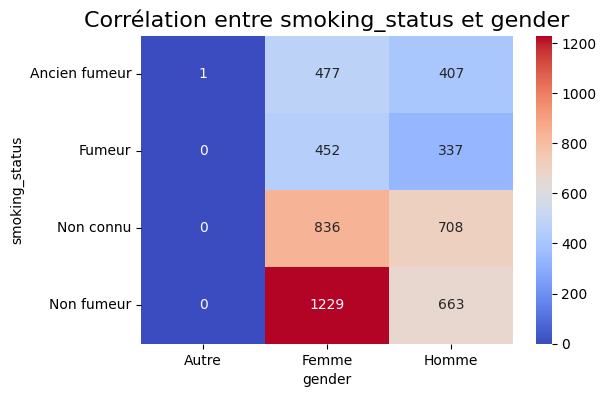

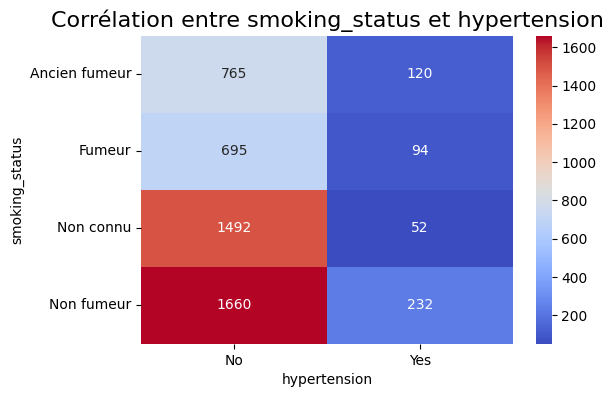

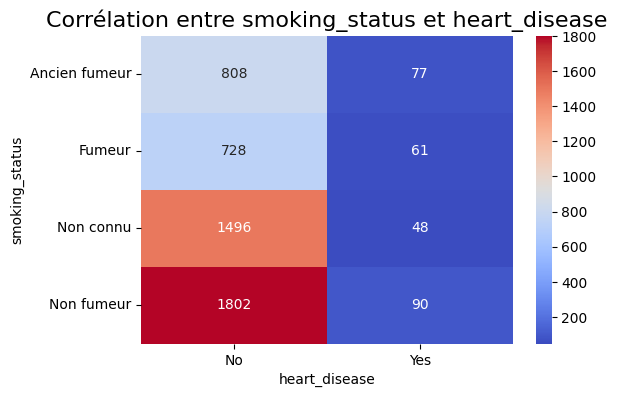

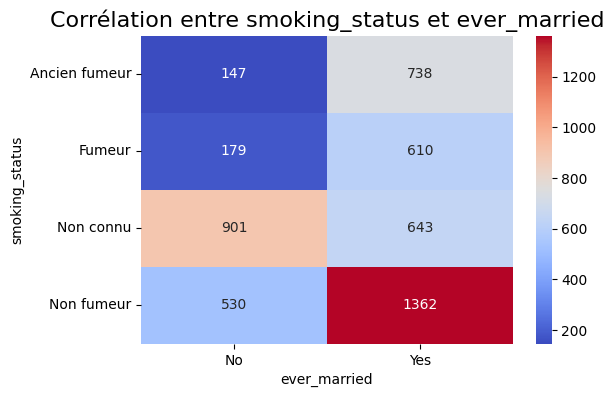

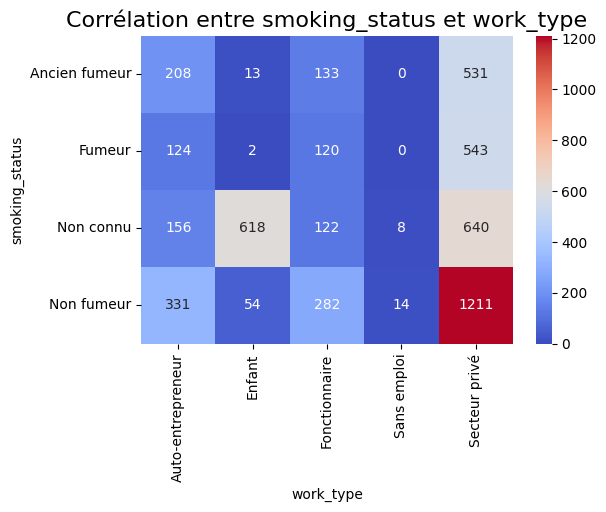

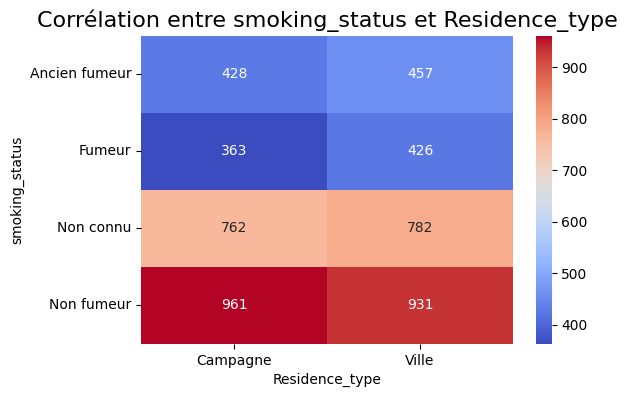

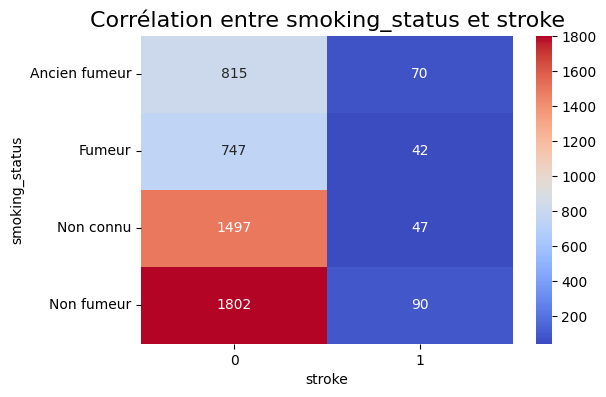

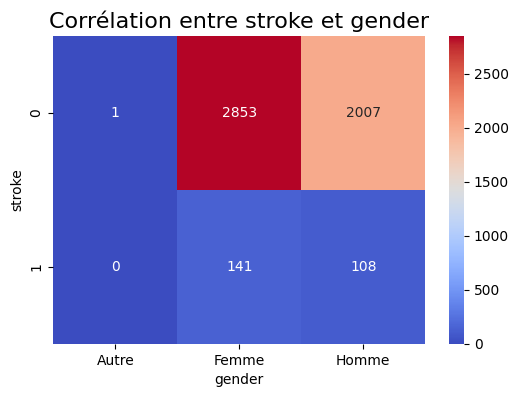

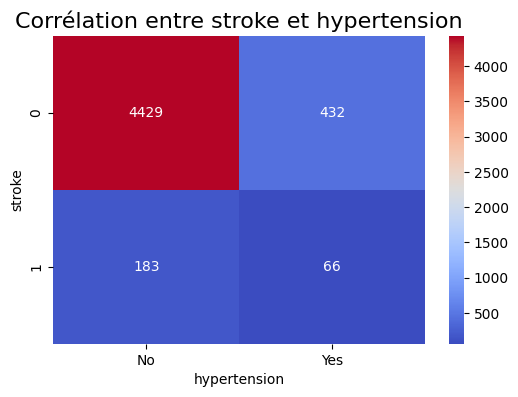

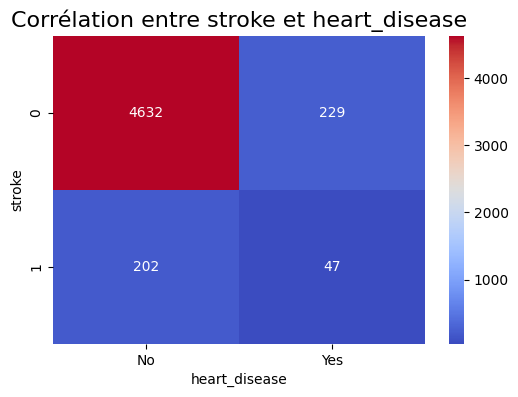

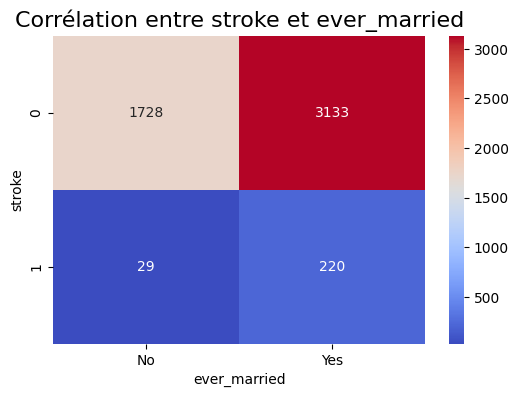

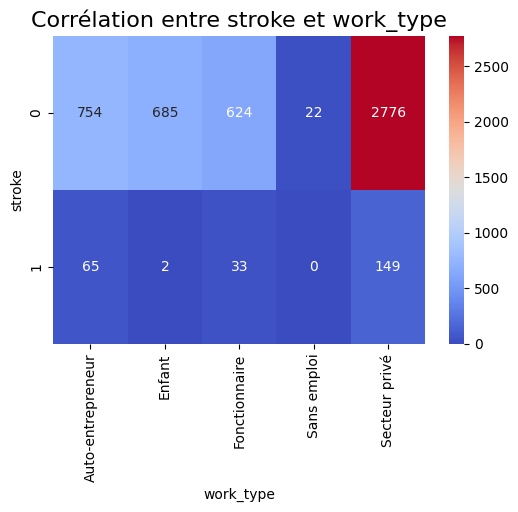

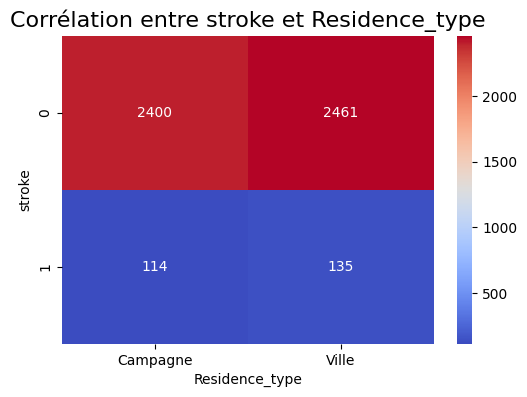

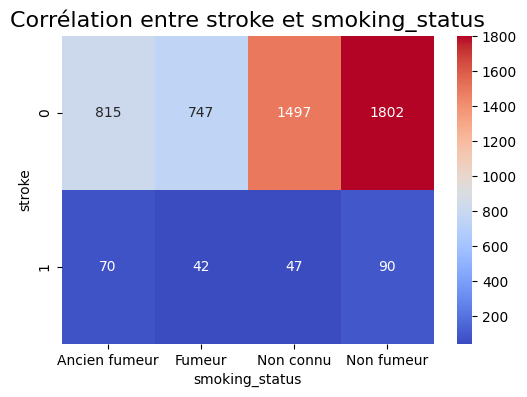

In [23]:
from scipy.stats import chi2_contingency

# Sélection des colonnes qualitatives pour le calcul de la corrélation
variables_qualitatives = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']
correlation_df = df[variables_qualitatives]

# Calcul de la matrice de corrélation en utilisant le test du Chi-deux
for var1 in correlation_df.columns:
    for var2 in correlation_df.columns:
        if var1 != var2:  # Pour éviter de calculer la corrélation d'une variable avec elle-même
            corr_matrix = pd.crosstab(correlation_df[var1], correlation_df[var2])
            chi2, p, _, _ = chi2_contingency(corr_matrix)
            corr_value = np.sqrt(chi2 / (chi2 + len(df)))

            # Tracé du heatmap
            plt.figure(figsize=(6, 4))
            heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".0f", annot_kws={"size": 10})
            plt.title(f'Corrélation entre {var1} et {var2}', fontsize=16)
            plt.xlabel(var2)
            plt.ylabel(var1)
            plt.show()

# Comparaison de l'âge moyen des patients ayant eu un AVC avec ceux qui n'en ont pas eu avec test T

In [28]:
from scipy import stats
# Séparer les données en deux groupes : patients avec AVC et patients sans AVC
avc_group = df[df['stroke'] == 1]['age']
no_avc_group = df[df['stroke'] == 0]['age']

# Calcul de l'âge moyen pour chaque groupe
avc_mean_age = avc_group.mean()
no_avc_mean_age = no_avc_group.mean()

# Effectuer un test t pour évaluer s'il existe une différence significative entre les deux groupes
t_statistic, p_value = stats.ttest_ind(avc_group, no_avc_group)

# Afficher les résultats
print(f"Âge moyen des patients ayant eu un AVC : {avc_mean_age:.2f} ans")
print(f"Âge moyen des patients n'ayant pas eu d'AVC : {no_avc_mean_age:.2f} ans")
print(f"\nTest t-statistique : {t_statistic:.2f}")
print(f"Valeur de p : {p_value:.4f}")

# Interprétation
if p_value < 0.05:
    print("\nIl existe une différence significative dans l'âge moyen entre les patients ayant eu un AVC et ceux qui n'en ont pas eu.")
else:
    print("\nIl n'existe pas de différence significative dans l'âge moyen entre les patients ayant eu un AVC et ceux qui n'en ont pas eu.")

Âge moyen des patients ayant eu un AVC : 67.73 ans
Âge moyen des patients n'ayant pas eu d'AVC : 41.97 ans

Test t-statistique : 18.08
Valeur de p : 0.0000

Il existe une différence significative dans l'âge moyen entre les patients ayant eu un AVC et ceux qui n'en ont pas eu.


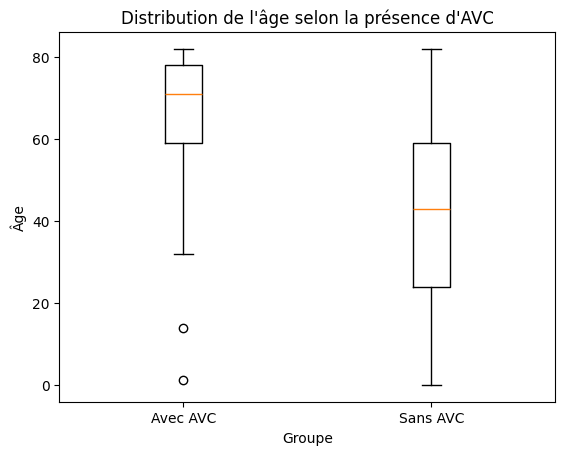

In [29]:
# Données à représenter
data = [avc_group, no_avc_group]
# Création du graphique en boîte
plt.boxplot(data, labels=['Avec AVC', 'Sans AVC'])

plt.xlabel('Groupe')
plt.ylabel('Âge')
plt.title('Distribution de l\'âge selon la présence d\'AVC')
plt.show()